# Install important dependencies

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtl
import math
import yfinance as yf



import pandas_ta as pa




# Data

Download weekly data for S&P500 from the beginning to september 30th 2024  as *pd.DataFrame* from yahoo finance using yfinance API.

In [52]:
# Download historical data for Apple (AAPL) over the last 5 years
from datetime import datetime

sp500 = yf.Ticker("^SPX") # create a ticker symbol
date_format = '%Y-%m-%d'
end_date =  datetime.strptime("2024-09-30", date_format)
data = sp500.history(start ="2000-01-01" , end = end_date, interval = "1d")



In [53]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0


In [54]:
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

# Technical indicators

drop every row where volume is 0

In [55]:
RSI = pa.rsi(data["Close"], length=14)
data["RSI"]=RSI
data["RSI"].isna().sum()

14

In [56]:
mask = data["RSI"].isna()
data.loc[mask]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI
Date,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,0.0,0.0,NaN
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,0.0,0.0,NaN
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,0.0,0.0,NaN
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,0.0,0.0,NaN
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,0.0,0.0,NaN
2000-01-10 00:00:00-05:00,1441.469971,1464.359985,1441.469971,1457.599976,1064800000,0.0,0.0,NaN
2000-01-11 00:00:00-05:00,1457.599976,1458.660034,1434.420044,1438.560059,1014000000,0.0,0.0,NaN
2000-01-12 00:00:00-05:00,1438.560059,1442.599976,1427.079956,1432.250000,974600000,0.0,0.0,NaN
2000-01-13 00:00:00-05:00,1432.250000,1454.199951,1432.250000,1449.680054,1030400000,0.0,0.0,NaN


In [57]:
data.dropna(axis = 0, how = "any", inplace=True)
data.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
RSI             0
dtype: int64

# Buy/Sell points

In [58]:
def signals(x):
    if x>=70:
        return 1
    elif x<=30:
        return -1
    else:
        return 0 

In [59]:
total_signals = [0]*len(data)

data["backtest"] = data["RSI"].apply(signals)



In [60]:
data["backtest"].value_counts()

backtest
 0    5707
 1     386
-1     117
Name: count, dtype: int64

In [61]:

data_grouped = data.groupby(data.index.map(lambda x: x.year))
data_grouped["backtest"].value_counts().tail(20)

Date  backtest
2017   1           50
2018   0          219
       1           19
      -1           13
2019   0          222
       1           28
      -1            2
2020   0          227
       1           20
      -1            6
2021   0          238
       1           14
2022   0          239
      -1            9
       1            3
2023   0          218
       1           30
      -1            2
2024   0          158
       1           29
Name: count, dtype: int64

# Basic strategy Backtest 

In [62]:
from backtesting import Backtest
# from myBacktest import FirstStrategy
from mlModel.mlClass import MLBasedStrategy




In [63]:

ts = Backtest(data, MLBasedStrategy, cash = 100000, commission=.002 )
# trade_on_close = True and look bias


stats = ts.run()

print(stats)



AttributeError: '_Array' object has no attribute 'pct_change'

In [ ]:
ts.plot()

ValueError: failed to validate DatetimeTickFormatter(id='p1138', ...).days: expected a value of type str, got ['%d %b', '%a %d'] of type list

## Optimization

# Labels

Compute log returns

In [ ]:
data["Log"] = np.log(data['Close']/data['Close'].shift(1)).dropna()
data.fillna(0, inplace=True)
data.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,backtest,Log
2024-09-23 00:00:00-04:00,5711.899902,5725.359863,5704.220215,5718.569824,3529550000,0.0,0.0,64.023898,0,0.002805
2024-09-24 00:00:00-04:00,5727.660156,5735.319824,5698.990234,5732.930176,3872710000,0.0,0.0,65.044479,0,0.002508
2024-09-25 00:00:00-04:00,5733.649902,5741.029785,5712.060059,5722.259766,3624910000,0.0,0.0,63.600716,0,-0.001863
2024-09-26 00:00:00-04:00,5762.220215,5767.370117,5721.009766,5745.370117,4391180000,0.0,0.0,65.392423,0,0.004031
2024-09-27 00:00:00-04:00,5755.359863,5763.779785,5727.339844,5738.169922,3898530000,0.0,0.0,64.329969,0,-0.001254


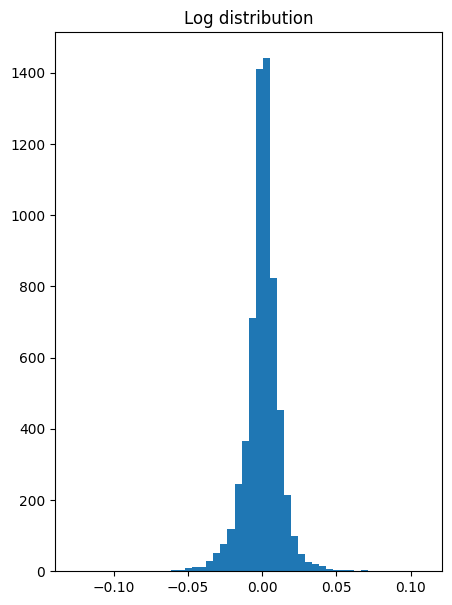

In [ ]:
fig = plt.figure(figsize=(5,7))

plt.hist(data["Log"], bins = 50)
plt.title("Log distribution")
plt.show()

Classify returns that are greater than 1 standard deviation from the mean as an uptrend and those that are below -1 standard deviation as a downtrend.

In [ ]:
descr = data["Log"].describe()
descr

count    6224.000000
mean        0.000220
std         0.012271
min        -0.127652
25%        -0.004811
50%         0.000600
75%         0.005917
max         0.109572
Name: Log, dtype: float64

In [ ]:
m_log = descr["mean"]
std_log = descr["std"]
 

# paramenter that can be used to optimize the ROC curve
up_tresh = m_log + std_log
down_tresh = m_log - std_log

In [ ]:

labels = pd.Series(np.where(data["Log"] > up_tresh, 1,np.where(data["Log"] < down_tresh, 2, 0)))
labels.value_counts()

0    4937
2     677
1     610
Name: count, dtype: int64

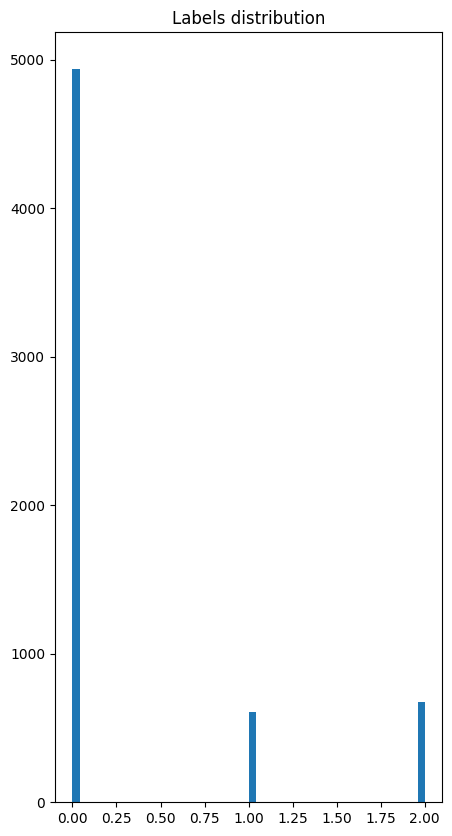

In [ ]:
fig = plt.figure(figsize=(5,10))
plt.hist(labels, bins=50)
plt.title("Labels distribution")
plt.show()

# Dataset

Set up the dataset:
* $y$ : add labels
* $\underline{X}$: add technical indicators  

In [ ]:

df = pd.DataFrame({"labels":labels}, )
df

,labels
0,0
1,2
2,0
3,0
4,1
...,...
6219,0
6220,0
6221,0
6222,0
